# Spatialdata-DB

`Spatialdata-DB` provides structured, easily searchable, [Spatialdata](https://spatialdata.scverse.org/en/stable/) datasets with integrated metadata, making it easier to share, access, and compare datasets.

`Spatialdata-DB` is based on [lamindb](https://docs.lamin.ai/introduction) - a framework to organize and structure biological datasets and experiments.
Therefore, every dataset is stored as a `lamindb.Artifact`, which provides not only access to the `Spatialdata` object, but additional context for each dataset.

## Brief intro to lamindb Artifacts

TL;DR:
- lamindb Artifact = `Spatialdata` dataset + metadata + dataset version history

[lamindb Artifacts](https://docs.lamin.ai/lamindb.artifact) are versioned, data wrapper objects that manage files locally or in the cloud with associated metadata.
They are a part of [lamindb](https://github.com/laminlabs/lamindb), a data framework for biology, which enables tracking data transformations, curating datasets, managing metadata, and querying a built-in database for common biological data types.

Further reading (in order):
- https://docs.lamin.ai/introduction
- https://docs.lamin.ai/tutorial

If you have questions, talk to Lea Zimmermann (Theislab), Tim Treis (scverse, Theislab), or Lukas Heumos (scverse, Lamin Labs, Theislab) on zulip or at the event.

A lamindb `Artifact` further stores sample-specific metadata that can be used to query and compare datasets.
This sample-specific metadata is embedded in the downloaded `Spatialdata` object under `spatialdata.attrs['sample']`.
In future versions, we plan to extend the metadata with technology-specific information and metadata from the `obs` slots.

## Sample-specific Metadata

### General Metadata
- **Product** – The name of the product (e.g. `In Situ Gene Expression` by `10x`).
- **Assay** – The experimental technique or method used (currently the database contains `Visium` and `Xenium`).
- **Biomaterial Type** – The type of biological sample (e.g., `Specimen from Organism`).
- **Organism** – The species from which the sample was derived. currently the database contains `Human` and `Mouse`, linked to [NCBItaxon](https://www.ebi.ac.uk/ols4/ontologies/ncbitaxon) ontology.
- **Tissue** – The specific tissue from which the sample was taken (linked to [UEBERON](https://www.ebi.ac.uk/ols4/ontologies/uberon)).
- **Modality** – e.g., RNA, protein.
- **Publish Date** – The release date of the dataset.
- **License** – Licensing terms for dataset usage.
- **Dataset URL** – A link to the dataset source.

### Patient Metadata
- **Development Stage** – The life stage of the sample donor (e.g., fetal, adult, linked to [Human Developmental Stages](https://www.ebi.ac.uk/ols4/ontologies/hsapdv) and [Mouse Developmental Stages](https://www.ebi.ac.uk/ols4/ontologies/mmusdv)).
- **Disease** – The primary disease associated with the sample (linked to [Mondo](https://mondo.monarchinitiative.org/) disease ontology).
- **Disease Details** – Additional details about the disease condition, if provided.

### Technical Metadata
- **Replicate** – Identifier, if the dataset is part of a collection.
- **Instrument(s)** – The equipment used for data acquisition.
- **Software** – The software tools used in the analysis.
- **Analysis Steps** – Which analysis steps were performed, if provided.
- **Chemistry Version** – The specific version of the assay.
- **Preservation Method** – How the sample was preserved before processing.
- **Staining Method** – The technique used to stain the sample.
- **Cells or Nuclei** – Specifies if the dataset contains single-cell or single-nucleus data.
- **Panel** – The gene panel or probes used for targeted assays.

### Genes
Additionally, each dataset is linked to the [Ensemble gene IDs](https://www.ebi.ac.uk/training/online/courses/ensembl-browsing-genomes/what-is-ensembl/).

## How to access the spatialdata-db instance and load datasets

There are two ways to access the data:

1) via the laminhub at [scverse/spatialdata-db](https://lamin.ai/scverse/spatialdata-db/artifacts). 
- the `Artifacts` tab provides an overview of the existing datasets.
- the `Collections` tab lists all available collections of datasets.
2) via a [lamindb](https://github.com/laminlabs/lamindb), the `Python API` client. How to find and download data via the API is explained in more detail in a separate notebook.

You also find a `template_notebook.ipynb` in this repository that you can copy and work with.

1) [Identify a dataset you want to work with](#identify-dataset)
2) [Load the dataset using `lamin`](#download-dataset)
3) [Use the dataset in your project](#use-dataset)

In [1]:
# !pip install lamindb[bionty] spatialdata spatialdata-plot

In [2]:
!lamin connect scverse/spatialdata-db

→ connected lamindb: scverse/spatialdata-db


In [3]:
import warnings

import bionty as bt
import lamindb as ln
import spatialdata as sd
import spatialdata_plot
import matplotlib.pyplot as plt
import pandas as pd

warnings.filterwarnings("ignore")

assert ln.setup.settings.instance.slug == "scverse/spatialdata-db"

→ connected lamindb: scverse/spatialdata-db


### 1) Identify a dataset you want to work with <a id="identify-dataset"></a>

The easiest way is probably to go to [lamin.ai/scverse/spatialdata-db/artifacts](https://lamin.ai/scverse/spatialdata-db/artifacts) and identify a dataset you want to work with.

For this example we'll use two human breast cancer samples that were profiled with Visium.

<img src="./human_breast_cancer.png" width="700">






### 2) load the dataset using `lamindb` <a id="download-dataset"></a>

`lamindb` in combination with the `bionty` plugin allow us to easily query for data and load it into memory or save it to disk.


In [4]:
# Define Bionty lookups for autocomplete
organisms = bt.Organism.lookup()
tissues = bt.Tissue.lookup()

In [5]:
# Query for datasets that originate from human breast tissue whose description contains 'Block'
ln.Artifact.filter(
    organisms=organisms.human,
    tissues=tissues.breast,
    description__icontains="Block"
).df()

,uid,key,description,suffix,kind,otype,size,hash,n_files,n_observations,_hash_type,_key_is_virtual,_overwrite_versions,space_id,storage_id,schema_id,version,is_latest,run_id,created_at,created_by_id,_aux,_branch_code
id,,,,,,,,,,,,,,,,,,,,,,,
627,TNY20rvb3p2soxGs0000,None,Human Breast Cancer (Block A Section 2),.zarr,None,spatialdata,73642848,8pIkoeyuP6vYDz0rYOY55A,327,None,md5-d,True,True,1,2,None,None,True,292,2025-03-13 00:38:02.943757+00:00,8,None,1
628,EF53sCOfQx8yPllK0000,None,Human Breast Cancer (Block A Section 1),.zarr,None,spatialdata,72341494,MNZmlpwYdEsFT75pzHhBEw,327,None,md5-d,True,True,1,2,None,None,True,292,2025-03-13 00:39:33.805090+00:00,8,None,1


In [6]:
# Load a dataset into memory using uid
sdata_section1 = ln.Artifact.get("EF53sCOfQx8yPllK0000").load()
sdata_section1

! run input wasn't tracked, call `ln.track()` and re-run


SpatialData object, with associated Zarr store: /home/lukas/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/EF53sCOfQx8yPllK.zarr
├── Images
│     ├── 'V1_Breast_Cancer_Block_A_Section_1_full_image': DataTree[cyx] (3, 2000, 2000), (3, 1000, 1000), (3, 500, 500), (3, 250, 250), (3, 125, 125)
│     ├── 'V1_Breast_Cancer_Block_A_Section_1_hires_image': DataArray[cyx] (3, 2000, 2000)
│     └── 'V1_Breast_Cancer_Block_A_Section_1_lowres_image': DataArray[cyx] (3, 600, 600)
├── Shapes
│     └── 'V1_Breast_Cancer_Block_A_Section_1': GeoDataFrame shape: (3798, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (3798, 36601)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        V1_Breast_Cancer_Block_A_Section_1_hires_image (Images), V1_Breast_Cancer_Block_A_Section_1 (Shapes)
    ▸ 'downscaled_lowres', with elements:
        V1_Breast_Cancer_Block_A_Section_1_lowres_image (Images), V1_Breast_Cancer_Block_A_Section_1 (Shapes)
    ▸ 'global', with elements:
        V1_

In [7]:
# Load the same dataset using a very explicit query
sdata_section1_query = ln.Artifact.filter(
    organisms=organisms.human,
    tissues=tissues.breast,
    description__icontains="Block A Section 1"
).one().load()
sdata_section1_query

! run input wasn't tracked, call `ln.track()` and re-run


SpatialData object, with associated Zarr store: /home/lukas/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/EF53sCOfQx8yPllK.zarr
├── Images
│     ├── 'V1_Breast_Cancer_Block_A_Section_1_full_image': DataTree[cyx] (3, 2000, 2000), (3, 1000, 1000), (3, 500, 500), (3, 250, 250), (3, 125, 125)
│     ├── 'V1_Breast_Cancer_Block_A_Section_1_hires_image': DataArray[cyx] (3, 2000, 2000)
│     └── 'V1_Breast_Cancer_Block_A_Section_1_lowres_image': DataArray[cyx] (3, 600, 600)
├── Shapes
│     └── 'V1_Breast_Cancer_Block_A_Section_1': GeoDataFrame shape: (3798, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (3798, 36601)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        V1_Breast_Cancer_Block_A_Section_1_hires_image (Images), V1_Breast_Cancer_Block_A_Section_1 (Shapes)
    ▸ 'downscaled_lowres', with elements:
        V1_Breast_Cancer_Block_A_Section_1_lowres_image (Images), V1_Breast_Cancer_Block_A_Section_1 (Shapes)
    ▸ 'global', with elements:
        V1_

In [8]:
section2 = ln.Artifact.get("TNY20rvb3p2soxGs0000")
section2.path.download_to("./sdata_section2.zarr")
sdata_section2 = sd.read_zarr("./sdata_section2.zarr")
sdata_section2

SpatialData object, with associated Zarr store: /home/lukas/code/202503_hackathon_owkin/data/sdata_section2.zarr
├── Images
│     ├── 'V1_Breast_Cancer_Block_A_Section_2_full_image': DataTree[cyx] (3, 2000, 2000), (3, 1000, 1000), (3, 500, 500), (3, 250, 250), (3, 125, 125)
│     ├── 'V1_Breast_Cancer_Block_A_Section_2_hires_image': DataArray[cyx] (3, 2000, 2000)
│     └── 'V1_Breast_Cancer_Block_A_Section_2_lowres_image': DataArray[cyx] (3, 600, 600)
├── Shapes
│     └── 'V1_Breast_Cancer_Block_A_Section_2': GeoDataFrame shape: (3987, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (3987, 36601)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        V1_Breast_Cancer_Block_A_Section_2_hires_image (Images), V1_Breast_Cancer_Block_A_Section_2 (Shapes)
    ▸ 'downscaled_lowres', with elements:
        V1_Breast_Cancer_Block_A_Section_2_lowres_image (Images), V1_Breast_Cancer_Block_A_Section_2 (Shapes)
    ▸ 'global', with elements:
        V1_Breast_Cancer_Block_A_

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04494382..1.011236].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.028089888..1.011236].


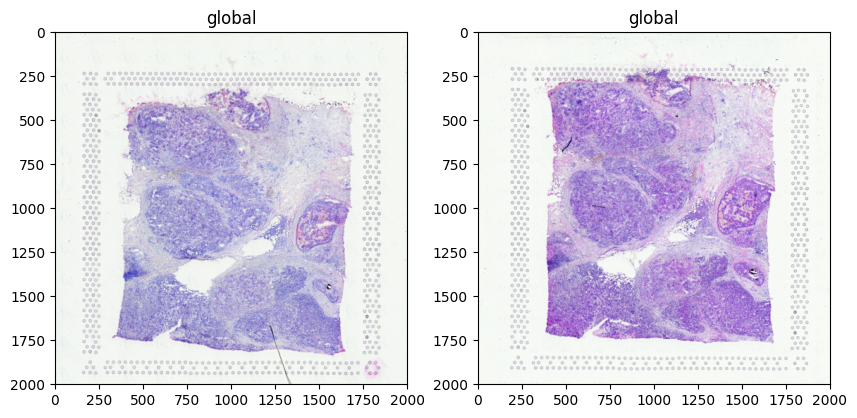

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sdata_section1.pl.render_images(
    elements="V1_Breast_Cancer_Block_A_Section_1_full_image"
).pl.show("global", ax=axs[0])

sdata_section2.pl.render_images(
    elements="V1_Breast_Cancer_Block_A_Section_2_full_image"
).pl.show("global", ax=axs[1])

### 3) Use the dataset in your project <a id="use-dataset"></a>

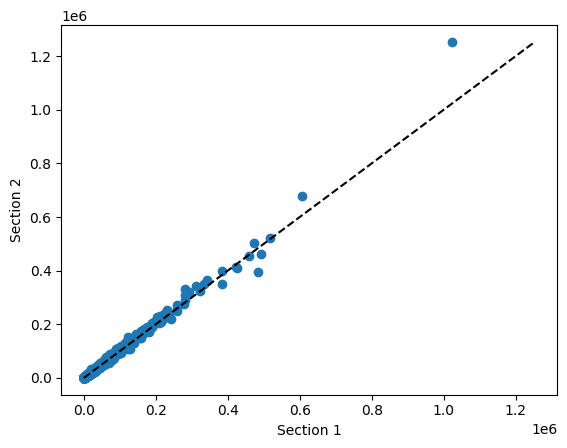

In [10]:
gene_sums_section1 = sdata_section1.table.to_df().sum(axis=0)
gene_sums_section2 = sdata_section2.table.to_df().sum(axis=0)

# find overlap of genes
overlap_genes = set(gene_sums_section1.index) & set(gene_sums_section2.index)

overlap_adata_section1 = sdata_section1.table[:, sdata_section1.table.var_names.isin(overlap_genes)]
overlap_adata_section2 = sdata_section2.table[:, sdata_section2.table.var_names.isin(overlap_genes)]

# filter the AnnData objects to only include overlap genes
df_for_viz = pd.DataFrame(
    {
        "section1": overlap_adata_section1.to_df().sum(axis=0),
        "section2": overlap_adata_section2.to_df().sum(axis=0),
    }
)

plt.scatter(df_for_viz["section1"], df_for_viz["section2"])
plt.xlabel("Section 1")
plt.ylabel("Section 2")
plt.plot([0, max(df_for_viz["section2"])], [0, max(df_for_viz["section2"])], "k--")
plt.show()

## How to search the lamindb instance via API

There are three different types of metadata features:

1. [Features linked to public ontologies](#query-ontologies)
2. [untyped labels](#query-ulabels)
3. [Lamin Artifacts can be bundled in collections](#query-collections)

### Public ontologies <a id="query-ontologies"></a>

The following will show an overview of useful query options, but more information and a longer introduction to Lamin's search option can be found on [Lamin query & search](https://docs.lamin.ai/registries).

#### Features linked to a public ontology
If a public ontology exists for feature, we link the value to the ontology term via [`bionty`](https://docs.lamin.ai/bionty).
This currently works for:
- **Assay**
- **Organism**
- **Tissue**
- **DevelopmentalStage**
- **Disease**


Bionty provides registries for all values that are present in the database for a given feature.
Here's an example how to get all available tissues in the database. 

In [11]:
bt.Tissue.df().head(5)

,uid,name,ontology_id,abbr,synonyms,description,space_id,source_id,run_id,created_at,created_by_id,_aux,_branch_code
id,,,,,,,,,,,,,
184,4Hfy9ESI,dorsal region element,UBERON:0005174,None,back organ|dorsal region organ,An Organ Or Element That Part Of The Dorsum Of...,1,78.0,291,2025-03-12 08:21:42.666647+00:00,8,None,1
183,5LflrjHn,dorsum,UBERON:0001137,None,back of body proper|dorsal part of organism|back,A Major Subdivision Of An Organism That Is The...,1,78.0,291,2025-03-12 08:21:42.666647+00:00,8,None,1
182,1nIzAifv,central nervous system,UBERON:0001017,None,systema nervosum centrale|CNS,The Central Nervous System Is The Core Nervous...,1,78.0,291,2025-03-12 08:21:42.666647+00:00,8,None,1
181,4M4dbTzv,spinal cord,UBERON:0002240,None,None,Part Of The Central Nervous System Located In ...,1,78.0,291,2025-03-12 08:21:41.759452+00:00,8,None,1
180,4YqJotiz,alimentary part of gastrointestinal system,UBERON:0005409,None,None,The Part Of The Digestive System That Excludes...,1,78.0,291,2025-03-12 08:15:17.552387+00:00,8,None,1


`df()` formats the information in human readable form to get an overview.
Bionty also provides `lookup` with autocompletion, which is the fastest way to search for a specific value.

Typing `tissue.` will list the possible values.

In [12]:
tissues = bt.Tissue.lookup(field='name')
tissues.bone

Tissue(uid='52I84mkZ', name='bone', space_id=1, created_by_id=8, run_id=279, created_at=2025-03-10 14:48:10 UTC)

In [13]:
organisms = bt.Organism.lookup(field='name')

These values can then be used to filter for Artifacts that match certain features, e.g. all datasets with `Organism = mouse` and `Tissue = brain`:

In [14]:
ln.Artifact.filter(
    organisms=organisms.mouse,
    tissues=tissues.brain,
).df().head(3)

,uid,key,description,suffix,kind,otype,size,hash,n_files,n_observations,_hash_type,_key_is_virtual,_overwrite_versions,space_id,storage_id,schema_id,version,is_latest,run_id,created_at,created_by_id,_aux,_branch_code
id,,,,,,,,,,,,,,,,,,,,,,,
605,SEmzlPzQlkJu5xnZ0000,None,"Adult Mouse Brain, IF Stained (FFPE)",.zarr,None,spatialdata,39022523,8yLc0N0nycIV_TEiCw0O1g,323,None,md5-d,True,True,1,2,None,None,True,292.0,2025-03-13 00:13:30.679426+00:00,8,None,1
606,JftwaJ5r6dJ4Egf60000,None,Adult Mouse Brain (FFPE),.zarr,None,spatialdata,46932103,4hCYy3MuNh8GGHWMKAMpsw,323,None,md5-d,True,True,1,2,None,None,True,292.0,2025-03-13 00:14:09.743296+00:00,8,None,1
553,lW2hWb2l1inlY3QY0000,None,"Mouse Brain (FFPE Mouse Brain (Sagittal), Spac...",.zarr,None,spatialdata,109884761,3LUEeTid4KI38ysKFD88hQ,451,None,md5-d,True,True,1,2,None,None,True,292.0,2025-03-12 22:57:25.768818+00:00,8,None,1


and can select individual artifact using the Artifact uid `ln.Artifact.get('SEmzlPzQlkJu5xnZ0000')` and display the associated features.

In [15]:
ln.Artifact.get("SEmzlPzQlkJu5xnZ0000").describe()

Artifact .zarr/spatialdata
├── General
│   ├── .uid = 'SEmzlPzQlkJu5xnZ0000'
│   ├── .size = 39022523
│   ├── .hash = '8yLc0N0nycIV_TEiCw0O1g'
│   ├── .n_files = 323
│   ├── .path = s3://scverse-spatial-eu-central-1/.lamindb/SEmzlPzQlkJu5xnZ.zarr
│   ├── .created_by = zimea (Lea Zimmermann)
│   ├── .created_at = 2025-03-13 01:13:30
│   └── .transform = 'upload_10X_datasets.py'
├── Dataset features/.feature_sets
│   ├── ['table'].var • 19454       [bionty.Gene]                                                       
│   │   Rpl27rt                     float                                                               
│   │   Hmga1b                      float                                                               
│   │   Krtap17-1                   float                                                               
│   │   Krtap16-1                   float                                                               
│   │   Krtap29-1                   float                                                               
│   │   Krtap9-5                    float                                                               
│   │   Gm11565                     float                                                               
│   │   2300003K06Rik               float                                                               
│   │   Gm11564                     float                                                               
│   │   Gm11596                     float                                                               
│   │   Krtap4-9                    float                                                               
│   │   Tas2r122                    float                                                               
│   │   Foxd1                       float                                                               
│   │   AI593442                    float                                                               
│   │   Fam47c                      float                                                               
│   │   F8a                         float                                                               
│   │   Tex13c1                     float                                                               
│   └── sample • 21                 [Feature]                                                           
│       Analysis Steps              cat[ULabel]                spaceranger count                        
│       Assay                       cat[bionty.ExperimentalF…  Visium Spatial Gene Expression           
│       Biomaterial Type            cat[ULabel]                Specimen from Organism                   
│       Cells or Nuclei             cat[ULabel]                unknown                                  
│       Chemistry Version           cat[ULabel]                Visium v1                                
│       Dataset Url                 cat[ULabel]                https://www.10xgenomics.com/datasets/adu…
│       Development Stage           cat[bionty.Developmental…  adult stage                              
│       Disease                     cat[bionty.Disease]        unknown                                  
│       License                     cat[ULabel]                Creative Commons Attribution 4.0 Interna…
│       Modality                    cat[ULabel]                RNA                                      
│       Organism                    cat[bionty.Organism]       mouse                                    
│       Preservation Method         cat[ULabel]                FFPE                                     
│       Product                     cat[ULabel]                Spatial Gene Expression                  
│       Publish Date                cat[ULabel]                2021-08-16                               
│       Software                    cat[ULabel]                Space Ranger v1.3.0                      
│       Stainin

In [16]:
sdata = ln.Artifact.get("SEmzlPzQlkJu5xnZ0000").load()
sdata

! run input wasn't tracked, call `ln.track()` and re-run


SpatialData object, with associated Zarr store: /home/lukas/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/SEmzlPzQlkJu5xnZ.zarr
├── Images
│     ├── 'Visium_FFPE_Mouse_Brain_IF_full_image': DataTree[cyx] (3, 2000, 1885), (3, 1000, 942), (3, 500, 471), (3, 250, 235), (3, 125, 117)
│     ├── 'Visium_FFPE_Mouse_Brain_IF_hires_image': DataArray[cyx] (3, 2000, 1885)
│     └── 'Visium_FFPE_Mouse_Brain_IF_lowres_image': DataArray[cyx] (3, 600, 566)
├── Shapes
│     └── 'Visium_FFPE_Mouse_Brain_IF': GeoDataFrame shape: (2438, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (2438, 19465)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        Visium_FFPE_Mouse_Brain_IF_hires_image (Images), Visium_FFPE_Mouse_Brain_IF (Shapes)
    ▸ 'downscaled_lowres', with elements:
        Visium_FFPE_Mouse_Brain_IF_lowres_image (Images), Visium_FFPE_Mouse_Brain_IF (Shapes)
    ▸ 'global', with elements:
        Visium_FFPE_Mouse_Brain_IF_full_image (Images), Visium_FFPE_Mouse_Br

Now for a quick first look into the dataset sample:

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.02].


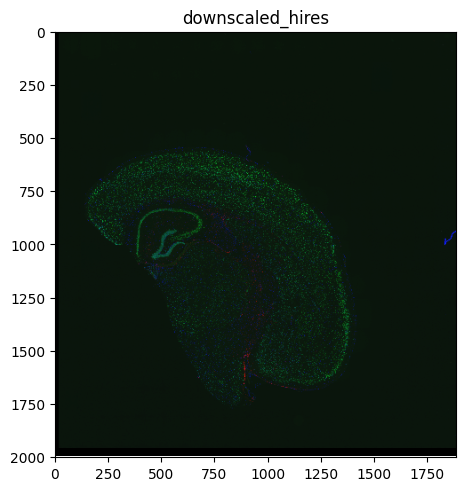

In [17]:
(
    sdata
    .pl.render_images(elements="Visium_FFPE_Mouse_Brain_IF_hires_image")
    .pl.show("downscaled_hires")
)

If you're not looking for a specific disease, but rather a range of diseases such as all `leukemia` subtypes, you can use the hierarchy of the ontologies to retrieve all children of one value:

In [18]:
diseases = bt.Disease.lookup(field='name')

leukemia = diseases.leukemia
leukemia_subtypes = leukemia.query_children()
leukemia_subtypes.df()

,uid,name,ontology_id,abbr,synonyms,description,space_id,source_id,run_id,created_at,created_by_id,_aux,_branch_code
id,,,,,,,,,,,,,
62,3tVTgJ1k,lymphoid leukemia,MONDO:0005402,None,subacute lymphoid leukaemia|lymphogenous leuke...,A Malignant Lymphocytic Neoplasm Of B-Cell Or ...,1,83,279,2025-03-10 15:34:35.798085+00:00,8,None,1
53,7OtSpdnC,acute lymphoblastic leukemia,MONDO:0004967,None,precursor cell lymphoblastic leukemia|acute ly...,"Leukemia With An Acute Onset, Characterized By...",1,83,279,2025-03-10 15:34:34.883025+00:00,8,None,1
64,7EIZsogb,acute leukemia,MONDO:0010643,None,acute leukemia (disease)|acute leukemia|acute ...,A Clonal (Malignant) Hematopoietic Disorder Wi...,1,83,279,2025-03-10 15:34:35.798085+00:00,8,None,1


### Untyped labels <a id="query-ulabels"></a>

Similar to the ontology features, Artifacts were labeled with [untyped labels](https://docs.lamin.ai/lamindb.ulabel).

**Known issues:** There is currently only **one** registry to store all untyped labels and therefore, the lookup function works on a union of all custom features (Chemistry Version **and** Modality **and** Software ...).
This makes searching for specific values harder and will be corrected as a next step in March/April.


In [19]:
# get an overview of all stored feature values
ln.ULabel.df().head(5)

,uid,name,is_type,description,reference,reference_type,space_id,type_id,run_id,created_at,created_by_id,_aux,_branch_code
id,,,,,,,,,,,,,
346,gClfOIUV,Sagittal-Posterior Section 2,None,None,None,None,1,None,NaN,2025-03-13 15:23:41.152863+00:00,8,None,1
345,KPrmuIPt,"Sagittal-Anterior, Section 1",None,None,None,None,1,None,291.0,2025-03-12 08:52:52.004537+00:00,8,None,1
344,cjFgpOzz,https://www.10xgenomics.com/datasets/mouse-bra...,None,None,None,None,1,None,291.0,2025-03-12 08:52:51.858038+00:00,8,None,1
343,VaKW5vA3,"Sagittal-Posterior, Section 1",None,None,None,None,1,None,291.0,2025-03-12 08:51:49.039514+00:00,8,None,1
342,zLlTEZuQ,https://www.10xgenomics.com/datasets/mouse-bra...,None,None,None,None,1,None,291.0,2025-03-12 08:51:48.893475+00:00,8,None,1


Using the `lookup` function, we can use autocorrection to quickly find values (just typing `ulabels.`):

In [20]:
ulabels = ln.ULabel.lookup()

In [21]:
ulabels.ffpe

ULabel(uid='QR4qUYMz', name='FFPE', space_id=1, created_by_id=8, run_id=279, created_at=2025-03-10 14:48:13 UTC)

And then use these values to filter Artifacts in exactly the same way as using the ontology registries:

In [22]:
query_fixed_frozen = ln.Artifact.filter(ulabels=ulabels.ffpe)
query_fixed_frozen.df(features=True).head(5)

,uid,key,description,Development Stage,Assay,Disease,Tissue,Organism,Analysis Steps,Staining Method,Product,Biomaterial Type,Modality,Publish Date,License,Dataset Url,Replicate,Instrument(s),Software,Chemistry Version,Preservation Method,Cells or Nuclei,Panel
id,,,,,,,,,,,,,,,,,,,,,,,
541,NoNzA5ygU9D120XJ0000,None,Human Skin (Xenium Human Skin Gene Expression ...,{adult stage},{10x Xenium},{melanoma},{skin},{human},NaN,NaN,{In Situ Gene Expression},{Specimen from Organism},{RNA},{2023-12-07},{Creative Commons Attribution 4.0 International},{https://www.10xgenomics.com/datasets/human-sk...,{Xenium Human Skin Gene Expression Panel with ...,{Xenium Analyzer},{Xenium Onboard Analysis v1.7.0},{Xenium v1},{FFPE},{Cells},{Xenium Human Skin Gene Expression Panel with ...
537,3SBDdSYRrkJ9msPA0000,None,Human Liver Data (Non-diseased),{adult stage},{10x Xenium},{healthy},{liver},{human},NaN,NaN,{In Situ Gene Expression},{Specimen from Organism},{RNA},{2024-03-05},{Creative Commons Attribution 4.0 International},{https://www.10xgenomics.com/datasets/human-li...,{Non-diseased},{Xenium Analyzer},{Xenium Onboard Analysis v1.9.0},{Xenium v1},{FFPE},{Cells},{Xenium Human Multi-Tissue and Cancer Panel}
595,VLyhgMjHvBf7PH6p0000,None,"Human Melanoma, IF Stained (FFPE)",{unknown},{Visium Spatial Gene Expression},{melanoma},{skin},{human},{spaceranger count},{Immunofluorescence},{Spatial Gene Expression},{Specimen from Organism},{RNA},{2022-07-13},{Creative Commons Attribution 4.0 International},{https://www.10xgenomics.com/datasets/human-me...,NaN,{Visium CytAssist},{Space Ranger v2.0.0},{Visium CytAssist v2},{FFPE},{unknown},NaN
575,4laLOWm930JsBfOS0000,None,"Human Brain Cancer, 11 mm Capture Area (FFPE)",{unknown},{Visium Spatial Gene Expression},{brain cancer},{brain},{human},{spaceranger count},{H&E},{Spatial Gene Expression},{Specimen from Organism},{RNA},{2023-02-14},{Creative Commons Attribution 4.0 International},{https://www.10xgenomics.com/datasets/human-br...,NaN,{Visium CytAssist},{Space Ranger v2.0.1},{Visium CytAssist v2},{FFPE},{unknown},NaN
570,yw3KTuyDrYepZGqB0000,None,Visium Mouse (Lung Replicate 1),{adult stage},{Visium Spatial Gene Expression},{healthy},{lung},{mouse},{spaceranger count},{H&E},{Spatial Gene Expression},{Specimen from Organism},{RNA},{2023-02-21},{Creative Commons Attribution 4.0 International},{https://www.10xgenomics.com/datasets/mouse-ti...,{Lung Replicate 1},{Visium CytAssist},{Space Ranger v2.0.1},{Visium CytAssist v2},{FFPE},{unknown},NaN


Alternatively, we can use standard string operations to filter feature values e.g. that all values that contains the string `Panel`:

In [23]:
ln.ULabel.filter(name__contains="Panel").df(include=['name'])

,uid,name,is_type,name
id,,,,
242,9aVmcl4y,Panel,None,Panel
244,79SSTJVk,Mouse Bone Data with Custom Add-on Panel,None,Mouse Bone Data with Custom Add-on Panel
245,bYhyUs38,Human Bone and Bone Marrow Data with Custom Ad...,None,Human Bone and Bone Marrow Data with Custom Ad...
246,tLeiiAuu,Xenium Human Multi-Tissue and Cancer Panel,None,Xenium Human Multi-Tissue and Cancer Panel
247,vTuIrZXe,Xenium Human CMulti-Tissue and Cancer Panel,None,Xenium Human CMulti-Tissue and Cancer Panel
248,k1t8AVbs,Xenium Human Skin Gene Expression Panel,None,Xenium Human Skin Gene Expression Panel
249,wGG0t7rP,Xenium Human Skin Gene Expression Panel with C...,None,Xenium Human Skin Gene Expression Panel with C...
250,UNeZo3sT,"Non-Diseased, Pre-Designed Panel",None,"Non-Diseased, Pre-Designed Panel"
251,JtMegtnf,Xenium Human Colon Gene Expression Panel,None,Xenium Human Colon Gene Expression Panel


Then we can use the `lookup` to search for all datasets that contain a certain gene panel:

In [24]:
query_gene_panel = ln.Artifact.filter(ulabels=ulabels.mouse_bone_data_with_custom_add_on_panel)
query_gene_panel.df(include=['otype'], features=True).head(5)

,uid,key,description,Development Stage,Assay,Disease,Tissue,Organism,Product,Biomaterial Type,Modality,Publish Date,License,Dataset Url,Replicate,Instrument(s),Software,Chemistry Version,Preservation Method,Cells or Nuclei,Panel,otype
id,,,,,,,,,,,,,,,,,,,,,,
528,y9UPzwarghMIXzlX0000,None,Xenium Mouse Bone Data (0.5M EDTA decalcificat...,{adult stage},{10x Xenium},{unknown},{bone},{mouse},{In Situ Gene Expression},{Specimen from Organism},{RNA},{2024-04-03},{Creative Commons Attribution 4.0 International},{https://www.10xgenomics.com/datasets/mouse-bo...,{0.5M EDTA decalcification},{Xenium Analyzer},{Xenium Onboard Analysis v1.9.0},{Xenium v1},{FFPE},{Cells},{Mouse Bone Data with Custom Add-on Panel},spatialdata
527,JD2TCLhGFLncQu1j0000,None,Xenium Mouse Bone Data (10% Formic acid decalc...,{adult stage},{10x Xenium},{unknown},{bone},{mouse},{In Situ Gene Expression},{Specimen from Organism},{RNA},{2024-04-03},{Creative Commons Attribution 4.0 International},{https://www.10xgenomics.com/datasets/mouse-bo...,{10% Formic acid decalcification},{Xenium Analyzer},{Xenium Onboard Analysis v1.9.0},{Xenium v1},{FFPE},{Cells},{Mouse Bone Data with Custom Add-on Panel},spatialdata
529,MU23dvRrDSaCWty40000,None,Xenium Mouse Bone Data (15% EDTA/0.4% PFA deca...,{adult stage},{10x Xenium},{unknown},{bone},{mouse},{In Situ Gene Expression},{Specimen from Organism},{RNA},{2024-04-03},{Creative Commons Attribution 4.0 International},{https://www.10xgenomics.com/datasets/mouse-bo...,{15% EDTA/0.4% PFA decalcification},{Xenium Analyzer},{Xenium Onboard Analysis v1.9.0},{Xenium v1},{FFPE},{Cells},{Mouse Bone Data with Custom Add-on Panel},spatialdata


In [25]:
artifact = query_gene_panel.first()

In [26]:
sdata = artifact.load()
sdata

! run input wasn't tracked, call `ln.track()` and re-run


SpatialData object, with associated Zarr store: /home/lukas/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/JD2TCLhGFLncQu1j.zarr
├── Images
│     ├── 'morphology_focus': DataTree[cyx] (1, 37499, 53915), (1, 18749, 26957), (1, 9374, 13478), (1, 4687, 6739), (1, 2343, 3369)
│     └── 'morphology_mip': DataTree[cyx] (1, 37499, 53915), (1, 18749, 26957), (1, 9374, 13478), (1, 4687, 6739), (1, 2343, 3369)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (37499, 53915), (18749, 26957), (9374, 13478), (4687, 6739), (2343, 3369)
│     └── 'nucleus_labels': DataTree[yx] (37499, 53915), (18749, 26957), (9374, 13478), (4687, 6739), (2343, 3369)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (253560, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (253560, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (253560, 1) (2D shapes)
└── Tables
      └── 'table': AnnDat

INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   


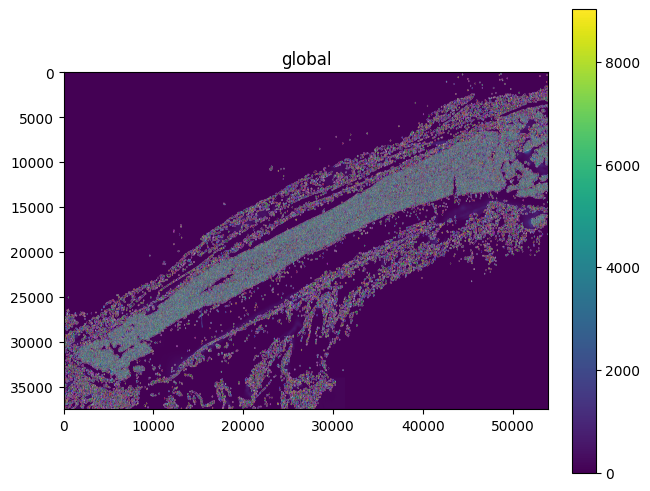

In [27]:
(
    sdata
    .pl.render_images(elements="morphology_focus")
    .pl.render_labels(elements="cell_labels")
    .pl.show("global")
)

### Collections <a id="query-collections"></a>

You can find different types of small data collections with two to eight datasets that bundle Artifacts.

Examples are:
- `Xenium Human Bone and Bone Marrow Data with Custom Add-on Panel` - disease and control data
- `Fresh Frozen Healthy Mouse Brain, 3 Replicates` - replicates of the same experiment
- `Mouse Brain, 3 Space Ranger Versions` - the same sample analysed with different Space Ranger versions
- `Human Glioblastoma, Targeted and Whole Transcriptome Panels` - the same condition monitored with different gene panels

You can find all collections on the [spatialdata-db instance](https://lamin.ai/scverse/spatialdata-db/collections)

Clicking at the `copy` button on the left of the collection name, will copy the code that retrieves the collection.

In [28]:
human_hyperplasia = ln.Collection.get("sgvg9mJCkA0ZtZoY0000")
human_hyperplasia.artifacts.df()

! no run & transform got linked, call `ln.track()` & re-run
! run input wasn't tracked, call `ln.track()` and re-run


,uid,key,description,suffix,kind,otype,size,hash,n_files,n_observations,_hash_type,_key_is_virtual,_overwrite_versions,space_id,storage_id,schema_id,version,is_latest,run_id,created_at,created_by_id,_aux,_branch_code
id,,,,,,,,,,,,,,,,,,,,,,,
533,kz8os9NXYaoJkHkK0000,None,Xenium Human Tonsil (Reactive follicular hyper...,.zarr,None,spatialdata,11575266089,lDDJJhPdVf5rsQmpXoBSfA,1400,None,md5-d,True,True,1,2,None,None,True,292,2025-03-12 22:08:12.376064+00:00,8,None,1
534,r7gQkRyjVesZUUZj0000,None,Xenium Human Tonsil (Follicular lymphoid hyper...,.zarr,None,spatialdata,9907793118,uAMcCLdbNvHIk0p74FmSJw,1599,None,md5-d,True,True,1,2,None,None,True,292,2025-03-12 22:12:12.417916+00:00,8,None,1


There are two ways to download all artifacts of the collection:
1) using `collection.cache()` - which caches all artifacts and returns the path to the local datasets
2) iteratively download each artifact to a specific path:
```python
    for artifact in human_hyperplasia.artifacts:
        artifact.path.download_to(...)

In [29]:
human_hyperplasia.cache()

! run input wasn't tracked, call `ln.track()` and re-run
! run input wasn't tracked, call `ln.track()` and re-run
! run input wasn't tracked, call `ln.track()` and re-run


[PosixUPath('/home/lukas/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/kz8os9NXYaoJkHkK.zarr'),
 PosixUPath('/home/lukas/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/r7gQkRyjVesZUUZj.zarr')]

In [30]:
sdata = ln.Artifact.get("kz8os9NXYaoJkHkK0000").load()
sdata

! run input wasn't tracked, call `ln.track()` and re-run


SpatialData object, with associated Zarr store: /home/lukas/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/kz8os9NXYaoJkHkK.zarr
├── Images
│     ├── 'morphology_focus': DataTree[cyx] (1, 40869, 53926), (1, 20434, 26963), (1, 10217, 13481), (1, 5108, 6740), (1, 2554, 3370)
│     └── 'morphology_mip': DataTree[cyx] (1, 40869, 53926), (1, 20434, 26963), (1, 10217, 13481), (1, 5108, 6740), (1, 2554, 3370)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (40869, 53926), (20434, 26963), (10217, 13481), (5108, 6740), (2554, 3370)
│     └── 'nucleus_labels': DataTree[yx] (40869, 53926), (20434, 26963), (10217, 13481), (5108, 6740), (2554, 3370)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (1349620, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (1349620, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (1349620, 1) (2D shapes)
└── Tables
      └── 'table':

INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   


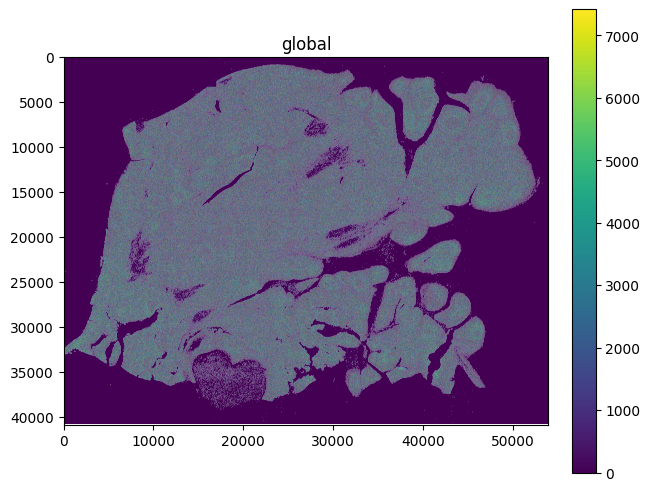

In [31]:
(
    sdata
    .pl.render_images(elements="morphology_focus")
    .pl.render_labels(elements="nucleus_labels")
    .pl.show("global")
)